In [20]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [21]:
df = pd.read_csv('files/salary_data_cleaned.csv')
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,same_state,age,python,aws,spark,excel,job_simp,seniority,desc_len,num_comp
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,48,1,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,37,1,0,0,0,data scientist,na,4783,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,11,1,0,1,1,data scientist,na,3461,0
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,56,1,0,0,0,data scientist,na,3883,3
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,23,1,0,0,1,data scientist,na,2728,3


In [22]:
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'same_state', 'age', 'python', 'aws', 'spark', 'excel',
       'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

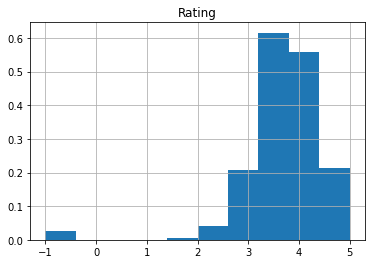

In [27]:
plt.hist(df.rating, density=True)
plt.title("Rating")
plt.grid()
plt.show()

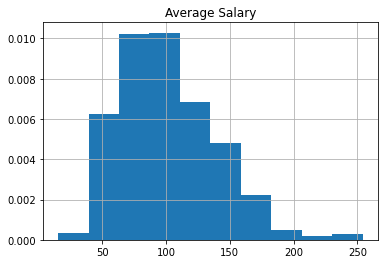

In [31]:
plt.hist(df.avg_salary, density=True)
plt.title("Average Salary")
plt.grid()
plt.show()

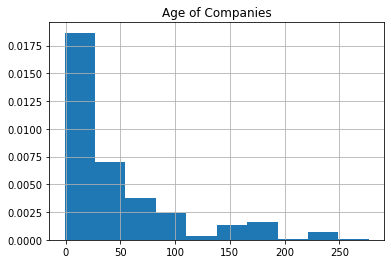

In [32]:
plt.hist(df.age, density=True)
plt.title("Age of Companies")
plt.grid()
plt.show()

<AxesSubplot:>

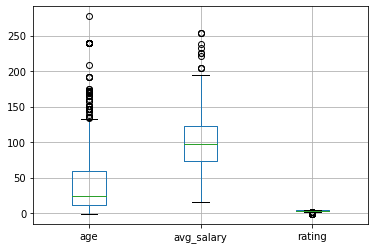

In [37]:
df.boxplot(column =['age', 'avg_salary', 'rating'], )

In [44]:
df[['age', 'avg_salary', 'rating', 'desc_len']].corr()

,age,avg_salary,rating,desc_len
age,1.000000,0.021936,0.023162,0.164188
avg_salary,0.021936,1.000000,0.012517,0.070474
rating,0.023162,0.012517,1.000000,-0.012281
desc_len,0.164188,0.070474,-0.012281,1.000000


<AxesSubplot:>

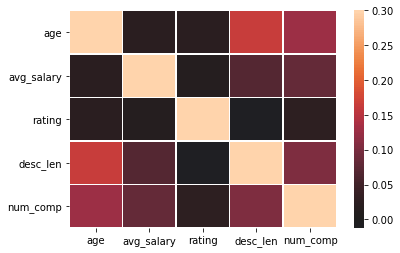

In [59]:
sns.heatmap(df[['age', 'avg_salary', 'rating', 'desc_len', 'num_comp']].corr(), \
           vmax=.3, center=0, linewidths=.5,)

In [61]:
numerical_features = [col for col in df.columns if df[col].dtypes != 'O']
discrete_features = [col for col in numerical_features if len(df[col].unique()) < 25 and col not in ['Id']]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [col for col in df.columns if df[col].dtype == 'O']

print("Total Number of Numerical Columns : ",len(numerical_features))
print("Number of discrete features : ",len(discrete_features))
print("No of continuous features are : ", len(continuous_features))
print("Number of discrete features : ",len(categorical_features))

Total Number of Numerical Columns :  15
Number of discrete features :  8
No of continuous features are :  7
Number of discrete features :  15


In [63]:
df_cat = df[['location', 'headquarters', 'size','type_of_ownership', 'industry', 'sector', 'revenue', 'company_name', 'job_state','same_state', 'python',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for location: total = 200


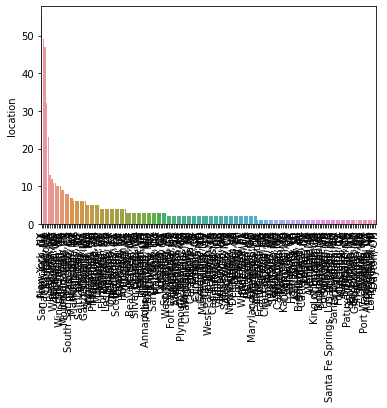

graph for headquarters: total = 198


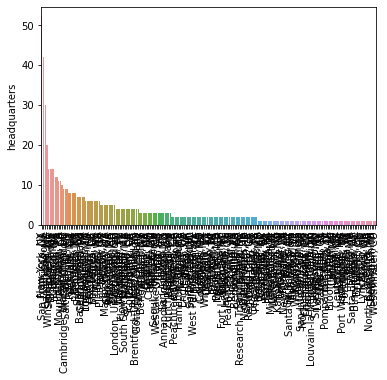

graph for size: total = 9


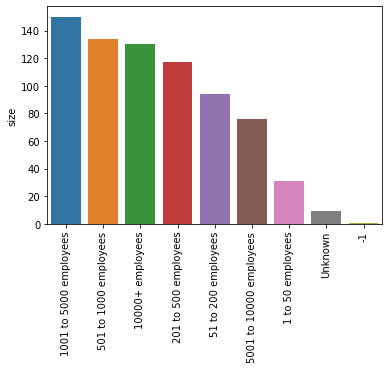

graph for type_of_ownership: total = 11


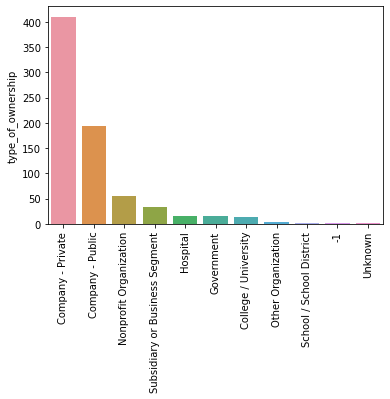

graph for industry: total = 60


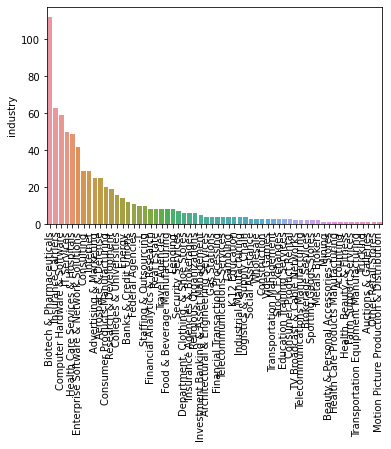

graph for sector: total = 25


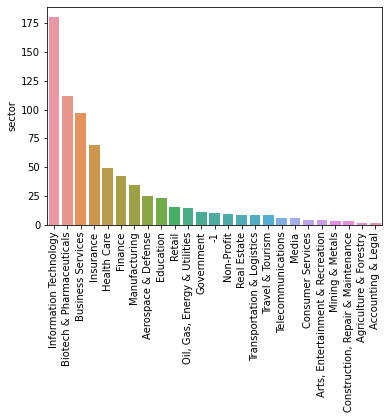

graph for revenue: total = 14


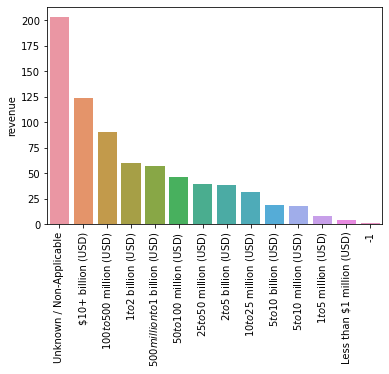

graph for company_name: total = 343


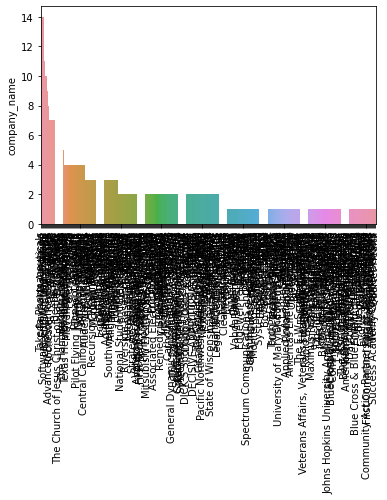

graph for job_state: total = 37


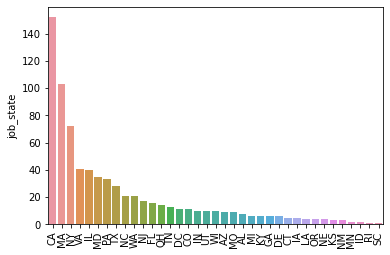

graph for same_state: total = 2


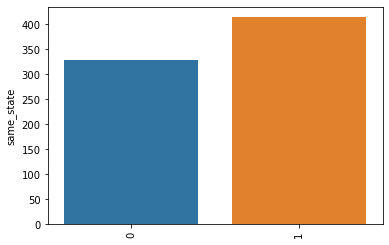

graph for python: total = 2


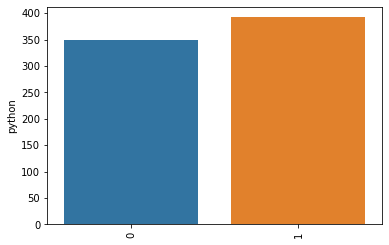

graph for spark: total = 2


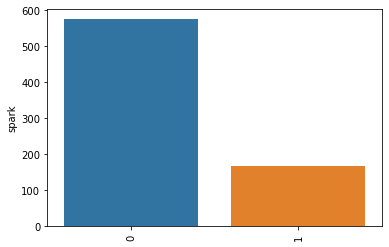

graph for aws: total = 2


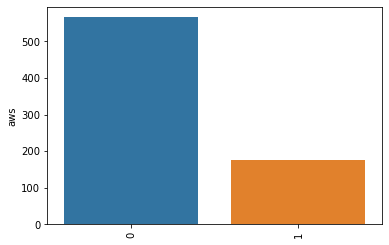

graph for excel: total = 2


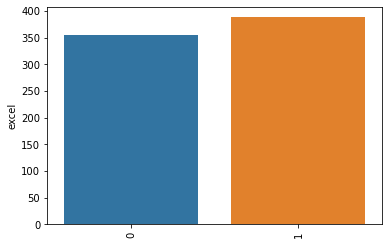

graph for job_simp: total = 7


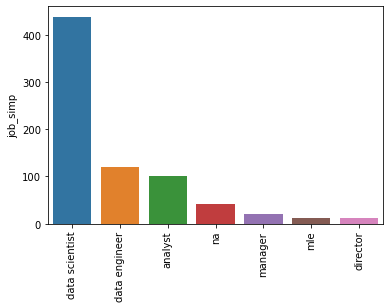

graph for seniority: total = 3


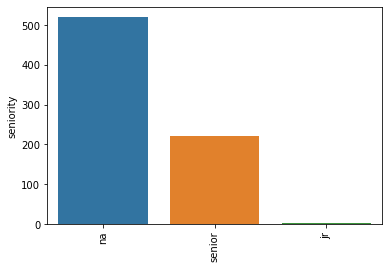

In [64]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [65]:
pd.pivot_table(df, index='job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,65.505000
data engineer,105.403361
data scientist,108.312785
director,173.500000
manager,83.428571
mle,119.958333
na,88.536585


In [68]:
df.groupby(['job_simp', 'seniority']).mean('avg_salary')['avg_salary']

job_simp        seniority
analyst         jr            56.500000
                na            61.000000
                senior        78.500000
data engineer   na            96.701220
                senior       124.689189
data scientist  jr           106.500000
                na            97.168966
                senior       130.309524
director        na           173.500000
manager         na            83.428571
mle             na           119.958333
na              na            86.096774
                senior        96.100000
Name: avg_salary, dtype: float64

In [69]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
DC,149.000000
UT,140.500000
CA,133.816667
MO,114.750000
MA,114.150685
VA,108.416667
NY,107.760000
MI,106.625000
IL,106.404762
